In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# A little statistics about normal distribution


The part attached below is about the standard normal distribution. Standard normal distribution is a specific kind of normal distribution(Gaussian distribution) with mean 0 and standard deviation of 1. We can use z-score to measure how far a specfic data is away from the mean. For example, a z-socre of 1 means the data is 1 sigma(or 1 standard deviation) away from the mean. Notice that, the data can fall on both the left and right of the data set. As a rtesult, our z-score can be negative, which means the data falls on the left side of the mean. 

To find the probability of a data falls in a range, we do the integral over Probability Density Function(PDF).  For example, if we want to find the probability that the data falls between 1 and 2. We do the integral of PDF, from 1 to 2. Besides, when we do the integral from negative infinity to positive infinity, the result will be 1. 
P.S The cumulative density distribution provided in scipy library gives us the probablity from negative infinity to a number we specify. 

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, stats.norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

This part we discuss about the probabilities of Xσ. The 1-tailed proability that the data lies away from 1 sigma is about 0.15866 from the z-score table. Notice, the 1-tailed probability means that we focus on 1-side. If we want to focus on the probablity that the data lies WITHIN 1 sigma of the mean. We need to use 1 - 2 * 0.15866. 

In [8]:
prob = 0.15866
print(stats.norm.ppf(prob))

-0.9999803859660787


The result is close to -1, which means 1 sigma away(left) from the mean. 

For this part, I explore the Chi-sqaured distribution. I choose the parameter to be 5 and plot the data.

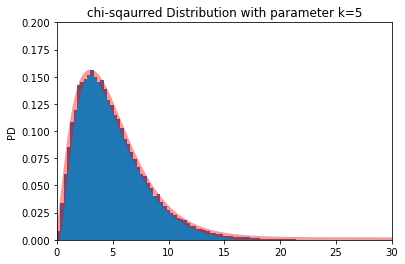

In [40]:
chi2 = stats.chi2(5)
samp = chi2.rvs(100000)
plt.title("chi-sqaurred Distribution with parameter k=5")
plt.ylabel("PD")
x = np.linspace(0, 30, 1000)
plt.hist(samp, 100, density=True)
plt.xlim([0, 30])
plt.ylim([0,0.2])
plt.plot(x, chi2.pdf(x), linewidth = 5, alpha = 0.4, color = 'r');

I randomly choose data over 5 to be considered as more-signal-liked. Data below 5 to be not-signal-like. Data that is exactly is also considered to be more-signal-like. It will not have any effect on the probablity because this distribution is continuous. As a result, for any specific data instead of a data range, thier probability is always 0 and have no effect on our result. 
Below is my development in finding out the Xσmeaning in distribution other than Gaussian. 

Since we want the probability that it is greater than 5. We use the total of the probability，in other words 1, and subtract the probability before 5. The probability is around 41%. So there is evidence that our data 

In [45]:
before5 = 1 - chi2.cdf(5)
print(before5)

0.415880186995508


We put it into a standard normal distribution to find out the sigma. As a result, the probability that it is more-signal-like is 0.21σ.
The answer is in negative because it measures from negative infinity of -0.21. It is the same 

In [56]:
normBefore5 = stats.norm.ppf(before5)
print(normBefore5)

-0.2124443692748587


Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. 

In [59]:
before10 = 1 -chi2.cdf(10)
normBefore10 = stats.norm.ppf(before10)
print(normBefore10)

-1.4378715888390514


The trend between this to give us the idea that when the data is away from the mean, their z-value also increase. This is correct, because σis a measure of data about how far it is away from the mean.

## NON-continuous distribution

# Poisson Distribution

I choose to explore the Poisson distribution for this part, with parameter mu = 15. (For Poisson distribution, mean and varience both equal to the parameter， which in this case, equal to 15)

Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

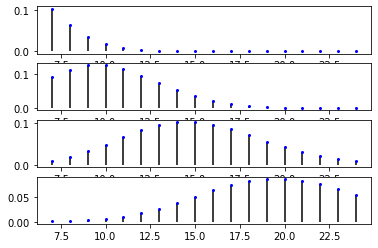

In [95]:

fig, ax = plt.subplots(4)
ax[0].plot(x, stats.poisson.pmf(x, 5), 'bo', ms=2, label='poisson pmf')
ax[0].vlines(x, 0, stats.poisson.pmf(x, 5))
ax[1].plot(x, stats.poisson.pmf(x, 10), 'bo', ms=2, label='poisson pmf')
ax[1].vlines(x, 0, stats.poisson.pmf(x, 10))
ax[2].plot(x, stats.poisson.pmf(x, 15), 'bo', ms=2, label='poisson pmf')
ax[2].vlines(x, 0, stats.poisson.pmf(x, 15))
ax[3].plot(x, stats.poisson.pmf(x, 20), 'bo', ms=2, label='poisson pmf')
ax[3].vlines(x, 0, stats.poisson.pmf(x, 20))


For example, we have a diata say 11.2 come from the poisson distribution of 15. We find its sigma.

In [96]:
probability = 1 - stats.poisson.cdf(15, 11.2)
print("Probability it is not a signal like data : ", probability*100, "%")


Probability it came from background :  9.260390828424692 %
Sigma certainty :  1.324889461906836


We find its sigma here

In [97]:
print("Sigma: ", stats.norm.ppf(1 - probability))

Sigma:  1.324889461906836


The parameters can be number like 9.2 because discrete is talking relative to continous. It does not mean that we need to have integers of our data. 